### 1. 什么是线性回归


In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = np.array([0.1, 0.2, 0.3, 
              0.4, 0.5, 0.6, 
              0.7, 0.8, 0.9, 1]).reshape(-1,1)

y = np.array([0.05,0.08,0.1,
             0.09,0.13,0.14,
             0.17,0.21,0.28,0.27]).reshape(-1,1)

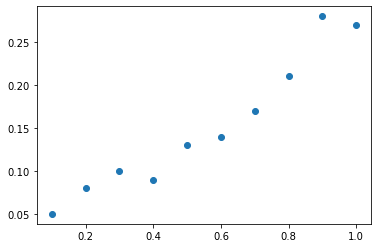

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
slr = LinearRegression()
slr.fit(X, y)
predict_y = slr.predict(X)
print('slope:',slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

slope: [0.25333333]
Intercept: 0.013


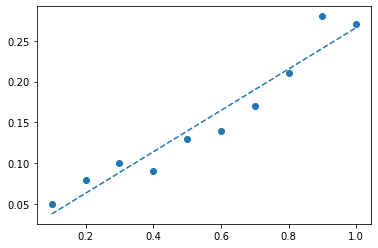

In [6]:
# fit linear features

y_predict = slr.predict(X)

# plot results
plt.scatter(X, y, label='training points')
plt.plot(X, y_predict, label='linear fit', linestyle='--')
plt.show()

### 2. 线性回归的评价方式

In [7]:
mse = np.mean((y-y_predict)**2)
print("MSE=",mse)

MSE= 0.00038133333333333346


In [8]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.6f' %mean_squared_error(y, predict_y))


MSE train: 0.000381


### 3. 线性回归的权重如何计算

In [9]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.1, n_iter=20):
        self.eta = eta  # learning rate 学习速率
        self.n_iter = n_iter  # 迭代次数

    def fit(self, X, y):  # 训练函数
        # self.w_ = np.zeros(1, 1 + X.shape[1]) 
        self.coef_ = np.zeros(shape=(1, X.shape[1]))  # 代表被训练的系数，初始化为 0
        self.intercept_ = np.zeros(1)
        self.cost_ = []   # 用于保存损失的空list

        for i in range(self.n_iter):
            output = self.net_input(X)  # 计算预测的Y
            errors = y - output  
            self.coef_ += self.eta * np.dot(errors.T, X)  # 根据更新规则更新系数，思考一下为什么不是减号？
            self.intercept_ += self.eta * errors.sum()  # 更新 bias，相当于x取常数1
            cost = (errors**2).sum() / 2.0     # 计算损失
            self.cost_.append(cost)  # 记录损失函数的值
        return self

    def net_input(self, X):   # 给定系数和X计算预测的Y
        output = np.dot(X, self.coef_.T) + self.intercept_
        return output

    def predict(self, X):
        return self.net_input(X)

In [10]:
slr = LinearRegressionGD(eta=0.1, n_iter=20)
slr.fit(X, y);  # 喂入数据进行训练

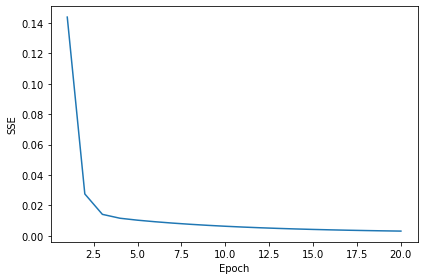

In [12]:
# cost function
plt.plot(range(1, slr.n_iter+1), slr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()

In [13]:
import pandas as pd

df = pd.read_csv('../data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [14]:
y = df.iloc[50:150,[2]].values
X = df.iloc[50:150,[0,1]].values

In [15]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

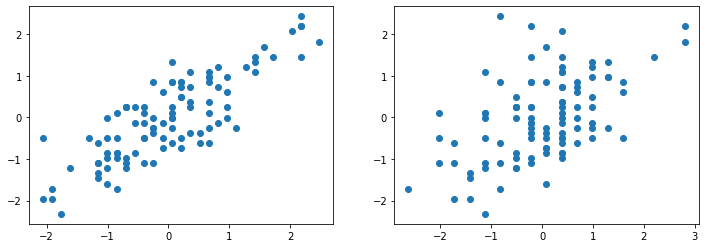

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax[0].scatter(X_std[:,0],y_std)
ax[1].scatter(X_std[:,1],y_std)
plt.show()

In [17]:
slr = LinearRegression()
slr.fit(X_std, y_std)


LinearRegression()

In [18]:
predict_y = slr.predict(X_std)

In [19]:
print('slope:',slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

slope: [0.77978751 0.08791319]
Intercept: 0.000


In [20]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f' %mean_squared_error(y_std, predict_y))


MSE train: 0.308
